In [287]:
import pandas as pd
import matplotlib.pyplot as plt

In [288]:
inventory_data = pd.read_excel('F:/New Test/Inventory Dataset.xlsx')

In [289]:
new_inventory_data = pd.read_excel('F:/New Test/New Inventory.xlsx')

In [290]:
merged_data = pd.merge(inventory_data, new_inventory_data, on='Item Number', how='outer')


In [302]:
all_dates = sorted(pd.concat([merged_data['Date'], new_inventory_data['Inventory Receive']]).unique())
valid_dates = pd.to_datetime(all_dates).dropna()
date_columns = [date.strftime('%m/%d/%Y') for date in valid_dates]


In [324]:
for _, row in merged_data.iterrows():
    item_number = row['Item Number']
    date = row['Date'] if pd.notna(row['Date']) else row['Inventory Receive']
    date_str = date.strftime('%m/%d/%Y')
    value = row['Inventory'] if pd.notna(row['Inventory']) else row['Total Item Qty']
    if item_number not in result_df.index:
        result_df.loc[item_number] = pd.NaT

    result_df.at[item_number, date_str] = value

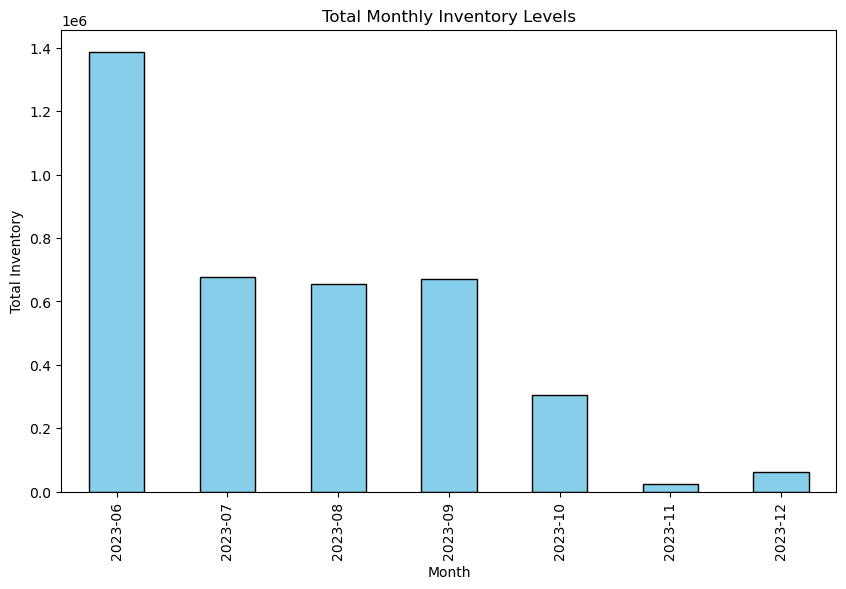

In [326]:
result_df.columns = pd.to_datetime(result_df.columns)

# Group by month and sum the values
monthly_sum = result_df.groupby(result_df.columns.to_period('M'), axis=1).sum()

# Plot the total monthly inventory levels
monthly_sum.sum(axis=0).plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Total Monthly Inventory Levels')
plt.xlabel('Month')
plt.ylabel('Total Inventory')
plt.show()